In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
# Replace 'your_dataset.csv' with your actual dataset file name
data = pd.read_csv('website_traffic.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [5]:
traffic = data.drop('Traffic Source', axis=1)

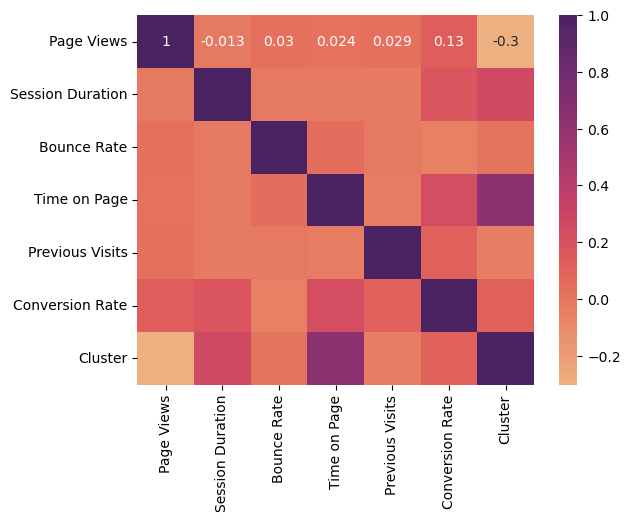

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Cluster
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635,-0.302376
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798,0.261664
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051,0.009572
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669,0.642097
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496,-0.034791
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000,0.110547
Cluster,-0.302376,0.261664,0.009572,0.642097,-0.034791,0.110547,1.000000


In [20]:
# Select only numeric columns (exclude 'Traffic Source')
numeric_data = traffic

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.show()
corr_matrix

In [14]:
# Calculate correlation coefficients related with Coversion Rate
correlations = traffic.corr()['Conversion Rate'].sort_values(ascending=False)
print("Correlation with Conversion Rate:\n")
print(correlations)

Correlation with Conversion Rate:



Conversion Rate     1.000000
Time on Page        0.229669
Session Duration    0.177798
Page Views          0.126635
Cluster             0.110547
Previous Visits     0.109496
Bounce Rate        -0.049051
Name: Conversion Rate, dtype: float64

In [7]:
# Select features with positive correlation
positive_correlations = correlations[correlations > 0].index
selected_features = traffic[positive_correlations].drop(columns=['Conversion Rate'])

# Display the selected features
selected_features.head()


,Time on Page,Session Duration,Page Views,Previous Visits
0,3.890460,11.051381,5,3
1,8.478174,3.429316,4,0
2,9.636170,1.621052,4,2
3,2.071925,3.629279,5,3
4,1.960654,4.235843,5,5


In [8]:
# Define the target variable
target = traffic['Conversion Rate']

X = selected_features
Y = target

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [10]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.03169167945402096


**Interpretation**

This model's Mean Absolute Error (MAE) of 0.0317 indicates that, on average, the predicted conversion rates deviate from the actual outcomes by 3.17 percentage points. This suggests that the model is fairly accurate in predicting conversions, with a small margin of error. Depending on the business context, this level of accuracy might be sufficient for making reliable decisions.

D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

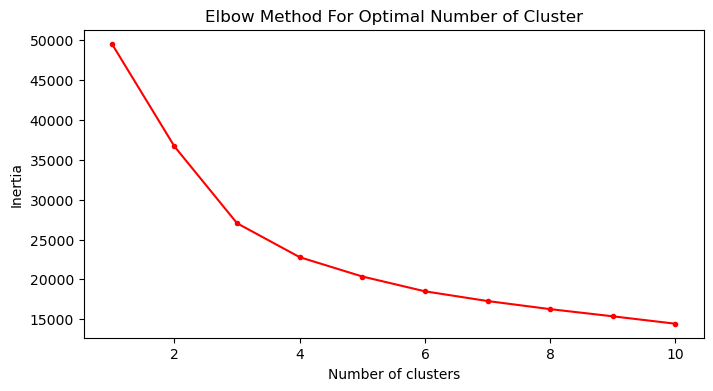

In [11]:
#Use the selected features for clustering
X_clustering = selected_features

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'r.-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Cluster')
plt.show()


In [21]:
# Assume we determine the optimal number of clusters to be 3 (replace if different)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

clusters = kmeans.fit_predict(X_clustering)

# Add the cluster labels to the original dataset
traffic['Cluster'] = clusters

D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Tyanj\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [22]:
# Calculate the mean values for each cluster
cluster_means = traffic.groupby('Cluster').mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
          Page Views  Session Duration  Bounce Rate  Time on Page  \
Cluster                                                            
0          7.313208          1.994288     0.285758      2.959120   
1          3.531060          1.944717     0.282543      2.813290   
2          4.759717          9.083344     0.280872      3.463099   
3          4.860656          2.240212     0.291331      8.734362   

         Previous Visits  Conversion Rate  
Cluster                                    
0               2.098113         0.987949  
1               1.943971         0.964089  
2               1.872792         1.000000  
3               1.964481         1.000000  


D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tyanj\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

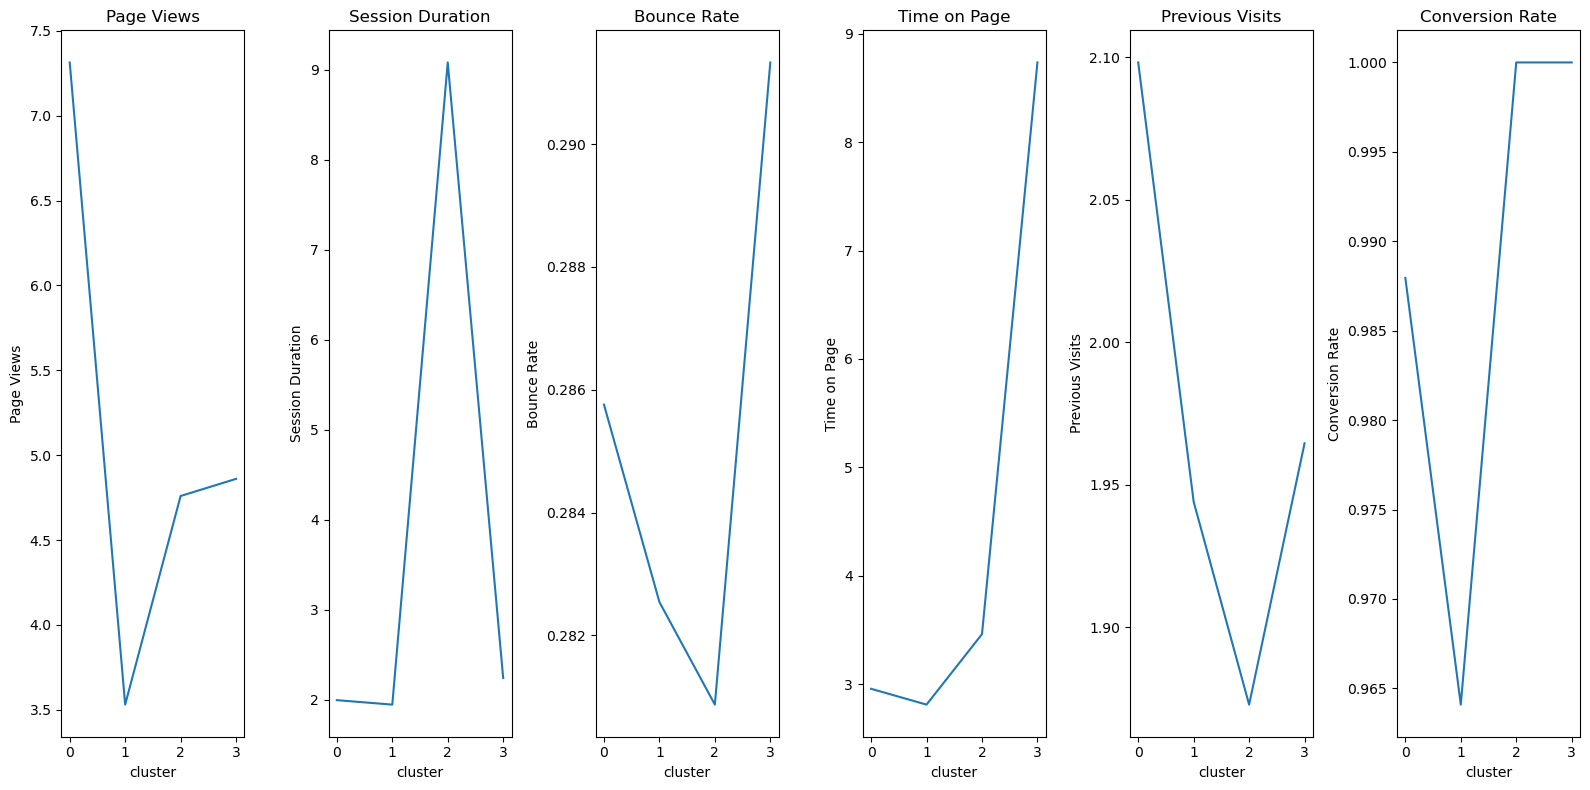

In [23]:
# List of columns to plot
columns = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']

# Create subplots - one for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(16, 8))  # Adjust the figure size as needed

# Plot each column in its own subplot
for i, col in enumerate(columns):
    sns.lineplot(x=cluster_means.index, y=cluster_means[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('cluster')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Findings Interpretation:
 
The line plots in the attached image provide an analysis of various website metrics (`Page Views`, `Session Duration`, `Bounce Rate`, `Time on Page`, `Previous Visits`, and `Conversion Rate`) across different clusters. Each cluster represents a group of users with similar behavior patterns based on the clustering analysis.
 
**1. Page Views:**
   - **Cluster 0** exhibits the highest average page views, indicating a strong engagement with the website.
   - **Cluster 1** has the lowest page views, while **Clusters 2 and 3** have moderate page views.<br>

**Insight:** Users in Cluster 0 are more active and possibly more interested in the content, whereas those in Cluster 1 may find the content less appealing or are less engaged.
 
**2. Session Duration:**
   - **Cluster 2** shows a significantly higher session duration compared to other clusters, suggesting that users in this group spend more time on the website.
   - **Clusters 0, 1, and 3** have lower session durations, indicating shorter visits.<br>
   
**Insight:** The higher session duration in Cluster 2 could indicate that users find the content more engaging or that the content requires more time to consume.
 
**3. Bounce Rate:**
   - **Cluster 3** has the highest bounce rate, indicating that users in this group are more likely to leave the site after viewing only one page.
   - **Clusters 0 and 1** have lower bounce rates, while **Cluster 2** has the lowest bounce rate.<br>
   
**Insight:** The low bounce rate in Cluster 2 suggests that users are more engaged and are likely to explore multiple pages, which could lead to a better overall user experience.
 
**4. Time on Page:**
   - **Cluster 3** shows the highest time on page, which correlates with its higher session duration.
   - **Clusters 0, 1, and 2** have lower times on page.<br>
   
**Insight:** Users in Cluster 3 spend more time on each page, possibly due to more complex or detailed content that requires a longer read.
 
**5. Previous Visits:**
   - **Cluster 0** users have the highest number of previous visits, indicating that they are repeat visitors.
   - **Cluster 2** has the fewest previous visits, suggesting that these users might be newer to the site.<br>
   
**Insight:** The high number of previous visits in Cluster 0 suggests that these users are loyal and frequently return to the website.
 
**6. Conversion Rate:**
   - **Cluster 3 and 2** have the highest conversion rate, followed by **Cluster 0**.
   - **Clusters 1** has the lowest conversion rates.<br>
   
**Insight:** Despite a higher bounce rate, users in Cluster 3 have the highest likelihood of converting, which could indicate that when these users do engage, they find what they are looking for.
 
### Overall Insights:
- **Cluster 0:** Represents users with high engagement (high page views and previous visits) but moderate session duration. This group is likely composed of loyal users who frequently visit the site.
- **Cluster 1:** Represents users with the lowest engagement metrics, suggesting that the website content may not resonate well with this group.
- **Cluster 2:** Represents users who spend the most time on the site and have the lowest bounce rate, indicating deep engagement with the content.
- **Cluster 3:** Represents users with a high conversion rate and high bounce rate, suggesting that while many users in this group leave quickly, those who stay are more likely to convert.
 
By identifying these patterns, the website can be optimized to better serve each cluster, potentially improving user engagement, retention, and conversion rates.

# Conclusion:
The analysis of website metrics across different user clusters provides valuable insights into user behavior and engagement. **Cluster 0** represents highly engaged and loyal users who frequently visit the site, indicating that the content appeals to them. **Cluster 1** shows the lowest engagement across all metrics, suggesting that the content may not resonate with these users, highlighting an area for potential improvement. **Cluster 2** consists of users who spend the most time on the site with the lowest bounce rate, indicating deep engagement, which could be further leveraged to enhance their experience. **Cluster 3** exhibits a high conversion rate despite a high bounce rate, indicating that while many users leave quickly, those who do stay are likely to find what they need and convert.